In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay



In [2]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=10,        
    shear_range=0.1,          
    zoom_range=0.1,           
    width_shift_range=0.1,    
    height_shift_range=0.1,   
    horizontal_flip=True,
    fill_mode='nearest'       
)


test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'fer2013/train',
    target_size=(48, 48),
    batch_size=64,
    class_mode='categorical',
    subset='training',
    color_mode='grayscale'
)

val_generator = train_datagen.flow_from_directory(
    'fer2013/train',
    target_size=(48, 48),
    batch_size=64,
    class_mode='categorical',
    subset='validation',
    color_mode='grayscale'
)

test_generator = test_datagen.flow_from_directory(
    'fer2013/test',
    target_size=(48, 48),
    batch_size=64,
    class_mode='categorical',
    color_mode='grayscale',
    
)

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [3]:
import collections
print(dict(collections.Counter(train_generator.classes)))


{0: 3196, 1: 349, 2: 3278, 3: 5772, 4: 3972, 5: 3864, 6: 2537}


In [4]:
model = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(48, 48, 1) ),
    BatchNormalization(),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(256, (3,3), activation='relu'),
    BatchNormalization(),
    Conv2D(256, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(7, activation='softmax')

])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 46, 46, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 44, 44, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 20, 20, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 20, 20, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 7, 7, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 5, 5, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,737,415 (6.63 MB)

 Trainable params: 1,736,519 (6.62 MB)

 Non-trainable params: 896 (3.50 KB)

In [5]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights = dict(enumerate(class_weights))





In [6]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)],
    class_weight=class_weights 
)


Epoch 1/30


/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


359/359 ━━━━━━━━━━━━━━━━━━━━ 121s 334ms/step - accuracy: 0.1541 - loss: 2.1472 - val_accuracy: 0.2392 - val_loss: 1.9416
Epoch 2/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 123s 341ms/step - accuracy: 0.1400 - loss: 1.9630 - val_accuracy: 0.1792 - val_loss: 1.9167
Epoch 3/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 120s 334ms/step - accuracy: 0.1934 - loss: 1.8904 - val_accuracy: 0.1625 - val_loss: 1.8633
Epoch 4/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 117s 326ms/step - accuracy: 0.1619 - loss: 1.8325 - val_accuracy: 0.1704 - val_loss: 1.8793
Epoch 5/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 122s 339ms/step - accuracy: 0.2104 - loss: 1.7582 - val_accuracy: 0.1829 - val_loss: 1.8319
Epoch 6/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 118s 329ms/step - accuracy: 0.1855 - loss: 1.7971 - val_accuracy: 0.3048 - val_loss: 1.7746
Epoch 7/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 120s 334ms/step - accuracy: 0.2426 - loss: 1.7902 - val_accuracy: 0.1738 - val_loss: 1.9952
Epoch 8/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 123s 344ms/step - accuracy: 0.2833 - loss: 1.75

In [7]:
loss, accuracy = model.evaluate(test_generator)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

113/113 ━━━━━━━━━━━━━━━━━━━━ 42s 370ms/step - accuracy: 0.5279 - loss: 1.2316
Test Loss: 1.2235, Test Accuracy: 0.5320


113/113 ━━━━━━━━━━━━━━━━━━━━ 38s 337ms/step


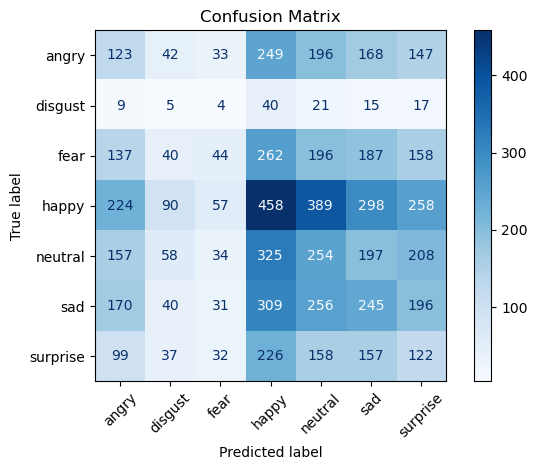

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

cm = confusion_matrix(y_true, y_pred_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


113/113 ━━━━━━━━━━━━━━━━━━━━ 34s 302ms/step
Classification Report:
              precision    recall  f1-score   support

       angry       0.13      0.13      0.13       958
     disgust       0.01      0.02      0.01       111
        fear       0.17      0.04      0.07      1024
       happy       0.25      0.27      0.26      1774
     neutral       0.17      0.20      0.18      1233
         sad       0.17      0.17      0.17      1247
    surprise       0.12      0.16      0.14       831

    accuracy                           0.17      7178
   macro avg       0.15      0.14      0.14      7178
weighted avg       0.18      0.17      0.17      7178

Precision (weighted): 0.1763
Recall (weighted): 0.1705
F1 Score (weighted): 0.1668


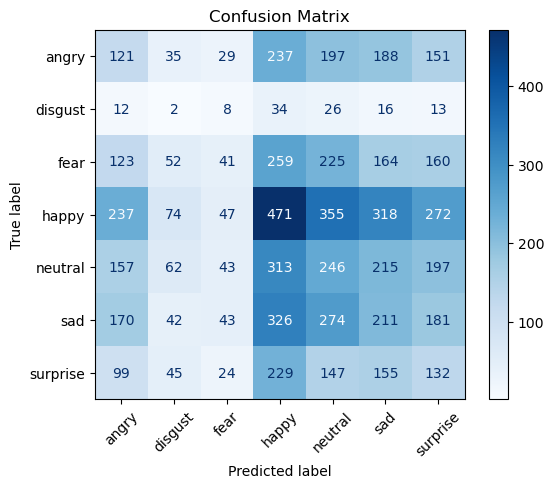

In [9]:

y_pred_probs = model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())


print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))


precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1 Score (weighted): {f1:.4f}")


cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()


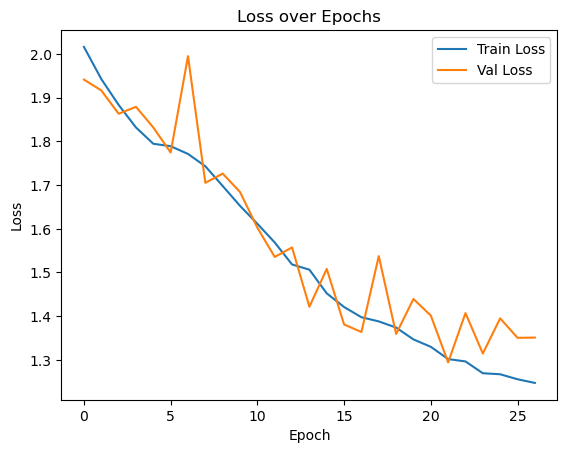

In [10]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.show()

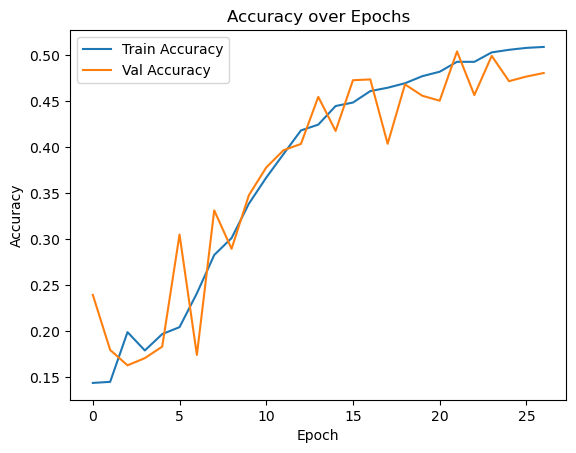

In [11]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


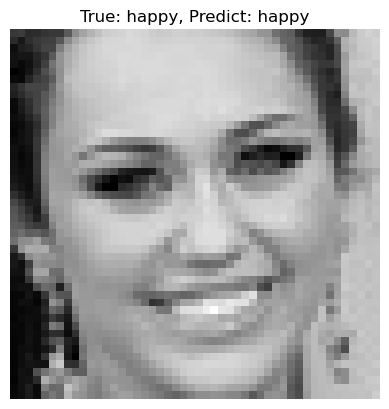

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


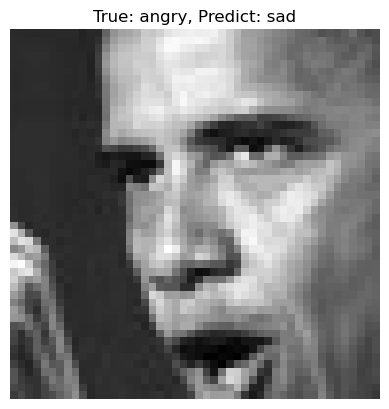

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


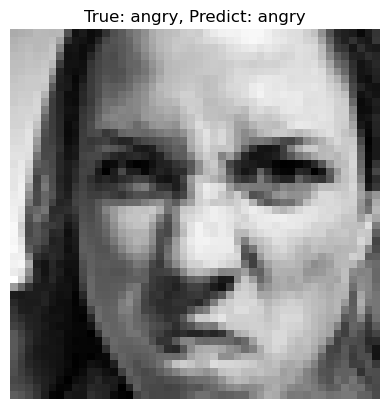

In [13]:
images, labels = test_generator[26]  
for i in range(3):
    image = images[i]
    true_label = np.argmax(labels[i])
    prediction = model.predict(np.expand_dims(image, axis=0))
    predicted_class = np.argmax(prediction)

    plt.imshow(image.squeeze(), cmap='gray')
    plt.title(f"True: {class_labels[true_label]}, Predict: {class_labels[predicted_class]}")
    plt.axis('off')
    plt.show()